# Time-Series Decompose

In [28]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

start_date = '2020-01-01' 
end_date = '2024-11-20' 

# 애플 주식의 데이터를 불러오기 
aapl = yf.download('AAPL', start=start_date, end=end_date) 
# 데이터 확인
aapl.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.662697,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.484352,75.797501,76.110001,74.290001,74.290001,132079200


In [38]:
df = pd.DataFrame()
df['Close'] = aapl['Close']
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 2020-01-02 to 2024-11-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1230 non-null   float64
dtypes: float64(1)
memory usage: 19.2+ KB


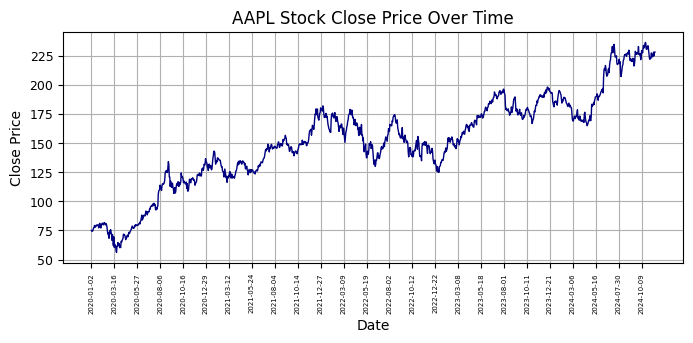

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(df, color='navy', linewidth=1)
plt.title('AAPL Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=9)
plt.grid(True)
plt.show()

In [56]:
ts_decompose = seasonal_decompose(df, model='addictive', period=30, extrapolate_trend=True)
ts_decompose.trend

Date
2020-01-02     75.864124
2020-01-03     76.056499
2020-01-06     76.248874
2020-01-07     76.441249
2020-01-08     76.633625
                 ...    
2024-11-13    229.616833
2024-11-14    229.692333
2024-11-15    229.767833
2024-11-18    229.843333
2024-11-19    229.918833
Name: trend, Length: 1230, dtype: float64

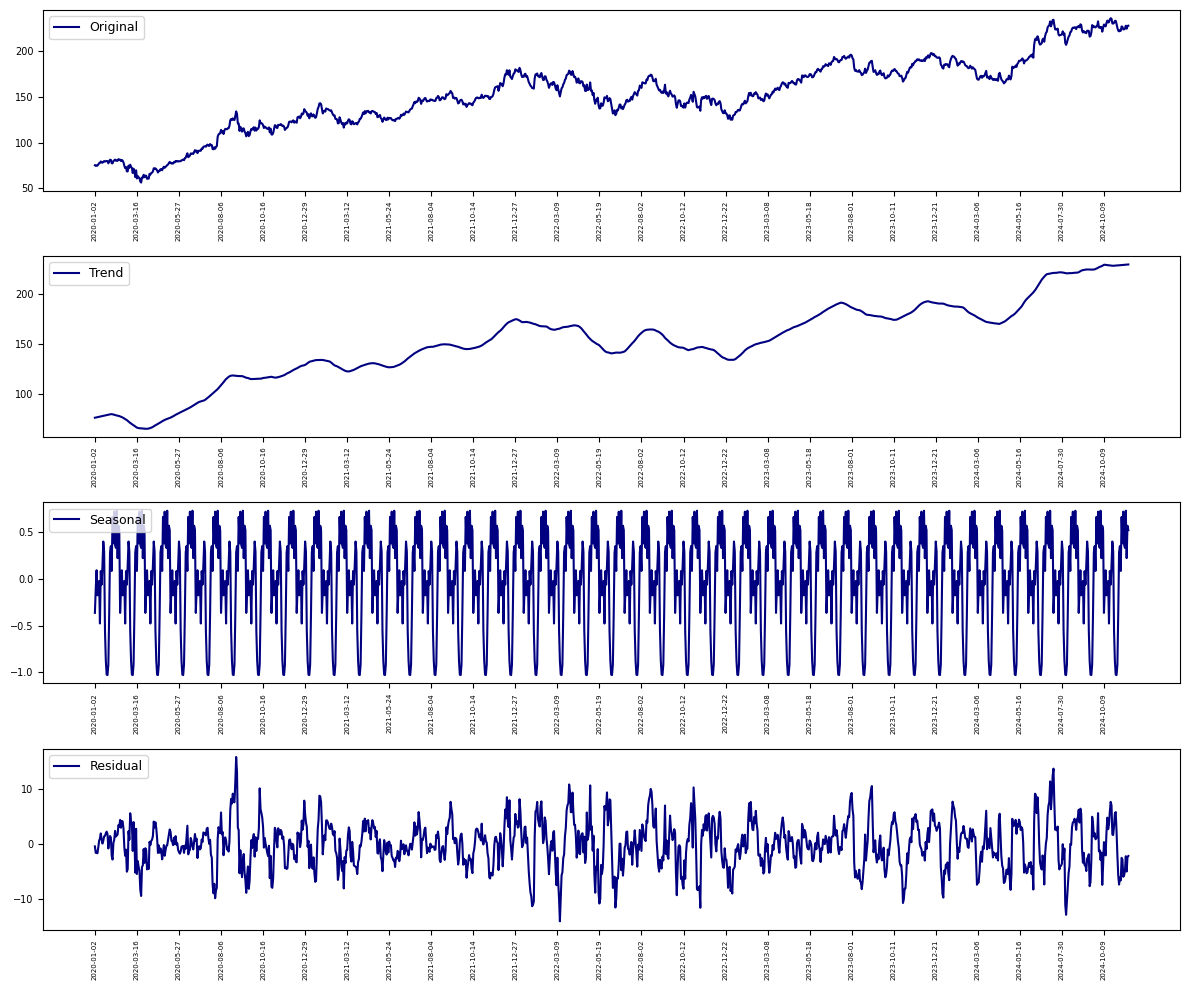

In [58]:

# 결과 시각화
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(ts_decompose.observed, label='Original', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)

# 추세 플롯
plt.subplot(4, 1, 2)
plt.plot(ts_decompose.trend, label='Trend', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)

# 계절성 플롯
plt.subplot(4, 1, 3)
plt.plot(ts_decompose.seasonal, label='Seasonal', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)

# 잔차 플롯
plt.subplot(4, 1, 4)
plt.plot(ts_decompose.resid, label='Residual', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

In [ ]:
# 출처 https://signature95.tistory.com/22

from statsmodels.tsa.stattools import adfuller, kpss

# 함수 형성
def adf_test(timeseries, pvalue = .05, regression_option = 'ct'):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] < pvalue:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.")
    else:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.")

def kpss_test(timeseries, pvalue = .05, regression_option = 'ct'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression= regression_option)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    if kpss_output[1] < pvalue:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성을 보장하지 못합니다.")
    else:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.")

In [ ]:
adf_test(ts_decompose.observed)

kpss_test(ts_decompose.observed)

Results of Dickey-Fuller Test:
Test Statistic                   -2.859837
p-value                           0.175835
Lags Used                         0.000000
Number of Observations Used    1229.000000
Critical Value (1%)              -3.966155
Critical Value (5%)              -3.414068
Critical Value (10%)             -3.129156
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.
Results of KPSS Test:
Test Statistic            0.423883
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
정상시계열이 맞다는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성을 보장하지 못합니다.


/tmp/ipykernel_45039/284195381.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < pvalue:
/tmp/ipykernel_45039/284195381.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression= regression_option)
/tmp/ipykernel_45039/284195381.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if kpss_output[1] < pvalue:
